<a href="https://colab.research.google.com/github/eskutza/AnalisisPredictivo/blob/main/colab/proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>

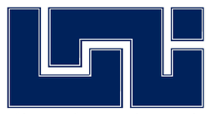
</center>



<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks

[UNI-DEPEC](https://posgrado.uni.edu.ni)

[eskutza](https://github.com/eskutza/AnalisisPredictivo)

# **Título del trabajo final**

# **Fase inicial: objetivo de negocio y descripción del dataset**

## <font color="#333F49">**Cargar librerías** <font>

### <font color="#333F49"> **Para el análisis de datos y el conjunto de datos** <font>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### <font color="#333F49">**Para el preprocesado y modelado** <font>

In [2]:
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

### <font color="#333F49">**Para los gráficos** <font>

In [3]:
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import altair as alt
import seaborn as sns

### <font color="#333F49">**Para serializar: grabar y recuperar los modelos entrenados** <font>

In [4]:
import pickle 
import os
from google.colab import files

### <font color="#333F49">**Para las alertas** <font>

In [5]:
import warnings
warnings.filterwarnings('ignore')

## <font color="#333F49">**Descripción del set de datos** <font>

Los $datos^1$ están relacionados con campañas de marketing directo de una institución bancaria portuguesa.

Las campañas de marketing se han basado en llamadas telefónicas. A menudo, ha sido necesario más de un contacto con el mismo cliente, clienta para poder detectar si estaba (o no) interesado en la contratación  de un producto (depósito a plazo bancario).

<font color="#666666">
<h10>
 (1) Fuente: S. Moro, R. Laureano y P. Cortez. Uso de la minería de datos para el marketing directo bancario: una aplicación de la metodología CRISP-DM
</font>

[Uso de la minería de datos para el marketing directo bancario]( http://repositorium.sdum.uminho.pt/handle/1822/14838)


**Objetivo de negocio inicial:** 

Definir un modelo que pueda explicar el éxito de un contacto, es decir, si el o la clienta suscribe el depósito. 

Aumentar la eficacia de la campaña al identificar las principales características que afectan al éxito, ayudando a una mejor gestión de los recursos disponibles (por ejemplo, el esfuerzo humano en llamadas telefónicas, tiempo) y la selección de un conjunto de clientes, clientas potenciales
compradoras.

El dataframe contiene 17 variables y 45211 observaciones.

Las variables se definen como:
- **age:** Edad de los y las clientas; variable numérica
- **job:** Corresponde al tipo de trabajo de los y las clientas; variable categórica
- **marital:** Estado civil de los y las clientas; variable categórica. A tener en cuenta, divorciado, divorciada recoge también las opciones de viudo o viuda
- **education:** Nivel de estudios que han alcanzado los y las clientas; variable categórica. A tener en cuenta que uno de los valores de esta variable es <font color="#0A66C2"><h10>"desconocido"<font> 


- **default:** Si el o la clienta tiene algún no o está al corriente de sus comprosimos creditíceos con la entidad; variable dicotómica
- **balance:** saldo anual medio en euros: variable numérica
- **housing:** Si el o la clienta tiene algún crédito hipotecario con la entidad; variable dicotómica
- **loan:** Si el o la clienta tiene algún crédito consumo con la entidad; variable dicotómica
- **contact:** Tipo de contacto; variable categórica. A tener en cuenta que uno de los valores de esta variable es <font color="#0A66C2"><h10>"desconocido"<font> 


- **day:** Último día de contacto del mes; varible numérica
- **month:** Último mes de contacto del año; varible categórica
- **duration:** Duración del último contacto en segundos; variable numérica
- **campaign:** Número de contactos realizados durante la campaña para cada cliente, clienta; variable numérica
- **pdays:** Número de días que pasaron después de que el o la clienta fue contactado por última vez desde una campaña anterior; variable numérica. A tener en cuenta, un valor de -1 significa que el cliente fue no contactado previamente
- **previous:** Número de contactos realizados antes de esta campaña y para este cliente, clienta; variable numérica
- **poutcome:** Resultado de la campaña de marketing anterior; variable categórica. A tener en cuenta que uno de los valores de esta variable es <font color="#0A66C2"><h10>"desconocido"<font> 


- **y:** ¿El o la clienta ha suscrito un depósito a plazo? <font color="#0A66C2"><h10>"**nuestra variable objetivo o variable respuesta**"<font> 

In [6]:
url = "https://raw.githubusercontent.com/eskutza/AnalisisPredictivo/main/Datasets/bank-full.csv"

In [7]:
df = pd.read_csv(url, sep =';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# **Fase 1: Análisis Exploratorio de los datos**

## <font color="#333F49">**Procesos implementados** <font>

+ Un primer **análisis** de los datos a partir de los **valores únicos** de cada una de las 17 variables del dataset

+ En segundo lugar, se ha procedido a **reemplazar los valores "unknown"** detectados en la primera aproximación a los datos.

+ En tercer lugar, se ha optado en el **proceso de codificación** por los siguientes procesos:
    + Variables como education y job, se convierten en variables ordinales (OrdinalEncoder). En este escenario, se ha optado por realizar imputaciones de los valores nulos de estas dos variables ordinales, utilizando la técnica de imputación del vecino más cercabo (**KNNImputer**)
    + En la variable contact con 13020 observaciones con valores null, tomando como hipótesis que el contacto del banco con el cliente, clienta se ha producido, más allá de los canales telefónicos, se ha procedido a considerar esos valores null como otra categoría de respuesta (canales como la sucursal, online que no se hayan recogido previamente y que pudieran estar afectando a la calidad de los datos).
    + Transformación de variables categóricas a numéricas (LabelEncoder):marital, default, housing, loan, poutcome, y (varibale objetivo)

+ En cuarto lugar, visualización del **Análisis Explotario de los datos con Pandas Profiling**

+ Y, en último lugar, se ha abordado un análisis de anomalías o detección de <font color="#0A66C2"><h10>**outliers (PyCaret)** <font>
    + En la **configuración del entorno** se ha tenido en cuenta la presencia de variables ordinales y cómo se categorizan los distintos órdenes; se han normalizado los datos con el método "zscore", dada las distintas escalas presentes en algunas variables del dataset; se ha eliminado la colinealidad perfecta de las variables; y, por último, no se ha tenido en cuenta la multicolinealidad con valores superiores a 0.75.
    + El modelo por el que se ha optado es el **modelo iforest**, siendo el umbral a aplicar en los datos del **0.05**.
    + **Modelo implementado:**

~~~~
Transformation Pipeline and Model Successfully Saved
(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['contrata'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_nume...
                  Fix_multicollinearity(correlation_with_target_preference=None,
                                        correlation_with_target_threshold=0.0,
                                        target_variable='UNSUPERVISED_DUMMY_TARGET',
                                        threshold=0.75)),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  IForest(behaviour='new', bootstrap=False, contamination=0.05,
     max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
     random_state=123, verbose=0)]],
          verbose=False), '/content/Anomaly_tarea_01_iforest.pkl')

~~~~

## <font color="#333F49"><h10>**Primeras reflexiones y áreas de mejora detectadas** <font> 

El Ánalisis Explotario de los datos nos marca algunas pautas a tener en cuenta.

<font color="#0A66C2"><h10>**Destacamos a nivel de negocio las siguientes** <font>:
- **Ratio de éxito esperado.** 
En la anterior campaña se alcanzó un umbral de éxito en la contratación del **3,3%**.


- **Ausencia de segmentaciones.** 
Nos llama la atención que no haya una o más de una segmentación de los y las clientas en función de los depósitos o vinculación con la entidad. Sería conveniente que se recogiese en futuros análisis para entre otras cuestiones, ponderar también si los esfuerzos en materia de gestión de clientes, clientas están alcanzando los objetivos marcados.


- **Segmentación por uso de canales.**  
El uso de las oficinas por los y las clientas es cada vez menor, no obstante, todavía habrá clientes y clientas que quieran establecer la relación con nuestra entidad de manera presencial, acudiendo a las sucursales, tomando el pulso a nuestros, nuestras gestoras. Medir el impacto o no de este tipo de campañas de telemarketing, marketing digital también sería oportuno que contase con una segmentación en función de los canales de uso. 

- **Calidad de los datos.**  
Revisar los procesos de obtención de datos para este tipo de campañas. En un momento en que los buzones de correo electrónico, llamadas teléfonicas desde departamentos, principalmente de empresas de telecomunicaciones, energéticas, debemos centrar muy bien el "tiro" de las mismas para no generar entre nuestros y nuestras propias clientas elementos de rechazo que pudieran traducirse en una pérdida de vinculación con la entidad. **El hecho que más del 80% de las observaciones tengan un valor de "desconocido" en la anterior campaña** es un claro indicador de la necesidad de implementar acciones de mejora en este apartado de la calidad de los datos.

<font color="#0A66C2"><h10>**Datos observados antes de definir los modelos de clasificación** <font>:
- **13020 observaciones no tenían asignado un canal de contacto** 

- **2% de las observaciones, en una variable binario como es el descubierto son respuestas afirmativas**. En el proceso de creación del entorno en PyCaret se tendrá en cuenta este aspecto, invocando al parámetro <font color="#0A66C2"><h10>remove_perfect_collinearity = True <font> 


- **1857 observaciones no tenían asignado un nivel de estudio**. Variable que se ha considerado ordinal y que en la imputación de NaN se han asigandos a "secondary".

- **288 observaciones no tenían asignado un nivel de ocupación**. Variable que se ha considerado ordinal y que en la imputación de NaN se han asigandos a "technician".

- **A priori no se detecta correlación entre las variables numéricas**. No obstante, la implementación del reporte de Pandas Profiling reveleva correlación entre variables numércias y categóricas que con la creación del entorno del modelo en PyCaret se mitigirán, invocando al parámetro <font color="#0A66C2"><h10>remove_multicollinearity = True <font>.



## <font color="#333F49">**Link a Colab con Procesos implementados en Fase 1** <font>

### [**Análisis Explotarorio de los datos**](https://github.com/eskutza/AnalisisPredictivo/blob/main/colab/EDA_Tarea_01.ipynb)


# **Fase 2: Aprendizaje Supervisado, Modelo de Clasificación preliminar** <font color="#0A66C2"><h10>**PyCaret** <font>

Se han implemnetado con **PyCaret** dos Modelos de Clasificación:
+ Un primer modelo con todas las observaciones, incluidas aquellas que en el Análisis Exploratorio de los Datos fueron categorizadas como **Outliers**.
+ Un segundo modelo **sin tener en cuenta** las observaciones que hemos definido como **Outliers** en la fase 1 (Análisis Exploratorio de los Datos).

## <font color="#333F49">**Modelo Clasificación:** <font><font color="#0A66C2"><h10>**PyCaret con outliers** <font>

El modelo de clasificación, dado el objetivo de maximizar los recursos y, sobre todo, de no perder vinculación por parte de nuestros, nuestras clientas, ha buscado el mejor ratio de **exhaustividad**.

<font color="#0A66C2"><h10>**A nivel de negocio** <font>:
- **Ratio de éxito esperado.** 
En los datos no vistos por el modelo y ajustando al Score de la predicción, obtenemos un  **3,1%**, similar al ratio obtenido en la **anterior campaña (3,3%)**.


- **Exhaustividad del 86,6%.** 


- **Exactitud del 77,3%.**  


- **Perder un potencial cliente, clienta, ¿cuánto nos supone?**  
El modelo propuesto, a la espera de posibles varaciones si se implementan las mejoras en la calidad de los datos, busca minimizar el impacto de perder un cliente, clienta potencial. Es por ello, que proponemos una segmentación en cuatro niveles cara al desarrollo de este tipo de campañas, siendo los más significativos los segmentos: 

    - **núcleo** (segmento que el modelo predice éxito y el score facilitado es igual o superior a la exactitud del modelo)
    - **plasma** (segmento que el modelo predice éxito, pero el score facilitado es inferior a la exactitud del modelo)


~~~~
condicion = [
    (pred['Label'] == 'yes') & (pred['Score'] >= 0.75),
    (pred['Label'] == 'yes') & (pred['Score'] >= 0.60) & (pred['Score']< 0.75),
    ((pred['Label'] == 'yes') & (pred['Score'] < 0.60) | (pred['Label'] == 'no') & (pred['Score'] < 0.60)),
    (pred['Label'] == 'no') & (pred['Score'] >= 0.60)
]
alternativa = ['Nucleo', 'Plasma', 'Periferia', 'No interesante']
pred['perfil'] = np.select(condicion, alternativa, default='Not Specified')
~~~

### <font color="#333F49">**Pipeline del modelo definido**<font>

~~~~
Transformation Pipeline and Model Successfully Saved
(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['contratanum', 'Anomaly',
                                                        'Anomaly_Score'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='contrata',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=Non...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=4,
                                         max_features='sqrt',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0005,
                                         min_impurity_split=None,
                                         min_samples_leaf=3, min_samples_split=5,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=260, n_jobs=-1,
                                         oob_score=False, random_state=123,
                                         verbose=0, warm_start=False)]],
          verbose=False), '/content/Contrata_modelo_tarea_01_pred.pkl')
~~~~

### <font color="#333F49">**Link a Colab Modelo Clasificación PyCaret con outliers** <font>

### [**Desarrollo del modelo clasificación con outliers**](https://github.com/eskutza/AnalisisPredictivo/blob/main/colab/PyCaret_clasificacion_01_Tarea_01.ipynb)


## <font color="#333F49">**Modelo Clasificación:** <font><font color="#0A66C2"><h10>**PyCaret con outliers** <font>

El modelo de clasificación, en busca del mejor ratio de **exhaustividad**, se ha implementado presciendo de los outliers detectados en el set de datos (modelo iforest, 0.05, implementado con Pycaret).

<font color="#0A66C2"><h10>**A nivel de negocio** <font>:
- **Ratio muy por debajo de lo esperado.** 
En los datos no vistos por el modelo y ajustando al Score de la predicción, obtenemos un  **0,4%**, claramente inferior a lo obtenido en la **anterior campaña (3,3%)** y en el **modelo con outliers (3,1%)**.

- **Los y las clientas que se sitúan en valores fuera del rango contamos con un segmento potencial a la contratación de este tipo de productos.** 



- **No se mejora significativamente la Exhaustividad. Del 86,6% pasamos al 87,4% .** 


- **Tampoco la Exactitud del modelo. Al prescidir de los outliers no se mejora de manera significativa, pasado del 77,3% al 78,2%.**  


- **Comentamos que la estrategia es no perder un potencial cliente, clienta**  
El modelo propuesto, a la espera de posibles varaciones si se implementan las mejoras en la calidad de los datos, busca minimizar el impacto de perder un cliente, clienta potencial. Es por ello, que proponemos una segmentación en cuatro niveles cara al desarrollo de este tipo de campañas, siendo los más significativos los segmentos: 

    - **núcleo** (segmento que el modelo predice éxito y el score facilitado es igual o superior a la exactitud del modelo). En los datos no vistos y sin outliers, se reduce este segmento.
    - **plasma** (segmento que el modelo predice éxito, pero el score facilitado es inferior a la exactitud del modelo). En los datos no vistos y sin outliers, se incrementa este segmento.


~~~~
condicion = [
    (pred['Label'] == 'yes') & (pred['Score'] >= 0.75),
    (pred['Label'] == 'yes') & (pred['Score'] >= 0.60) & (pred['Score']< 0.75),
    ((pred['Label'] == 'yes') & (pred['Score'] < 0.60) | (pred['Label'] == 'no') & (pred['Score'] < 0.60)),
    (pred['Label'] == 'no') & (pred['Score'] >= 0.60)
]
alternativa = ['Nucleo', 'Plasma', 'Periferia', 'No interesante']
pred['perfil'] = np.select(condicion, alternativa, default='Not Specified')
~~~

### <font color="#333F49">**Pipeline del modelo definido**<font>

~~~
Transformation Pipeline and Model Successfully Saved
(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['contratanum', 'Anomaly',
                                                        'Anomaly_Score'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='contrata',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=Non...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='entropy', max_depth=4,
                                         max_features='log2',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0002,
                                         min_impurity_split=None,
                                         min_samples_leaf=5, min_samples_split=9,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=130, n_jobs=-1,
                                         oob_score=False, random_state=123,
                                         verbose=0, warm_start=False)]],
          verbose=False),
 '/content/Contrata_modelo_tarea_01_sinoutliers_pred.pkl')
 ~~~

### <font color="#333F49">**Link a Colab Modelo Clasificación PyCaret sin outliers** <font>

### [**Desarrollo del modelo clasificación sin outliers**](https://github.com/eskutza/AnalisisPredictivo/blob/main/colab/PyCaret_clasificacion_02_Tarea_01.ipynb)


# **Fase 3: Aprendizaje Supervisado, Modelo de Clasificación customizado** <font color="#f89938"><h10>**Random Forest Classifier** <font>

El modelo de Randon Forest Classifier implementado con scikit - learn, nos marca como la variable duración tiene una gran importancia en el éxito de la campaña.

<font color="#0A66C2"><h10>**Destacamos a nivel de negocio las siguientes** <font>:
- **No logramos reducir el ratio de falsos negativos** 


- **Relevancia de la variable duración del contacto.** 
Formar al equipo de ventas en aspectos que tengan que ver con los tiempos y ritmos de contacto, así como el impacto del mismo en la contratación.

- **Mejorar la calidad de los datos.** 
La categoría que hemos definido como "otros" (ni móvil ni teléfono) es la segunda variable con mayor relavancia en la predicción de la contratación. Se hace necesario trabajar una clara segmentación de los y las clientas en función de los canales de relación y, sobre todo, de contratación de productos


## <font color="#333F49">**Parametrización del algoritmo** <font>

~~~
modelo = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                class_weight='balanced_subsample',
                                criterion='gini', max_depth=4,
                                max_features='sqrt',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0005,
                                min_impurity_split=None,
                                min_samples_leaf=3, min_samples_split=5,
                                min_weight_fraction_leaf=0.0,
                                n_estimators=260, n_jobs=-1,
                                oob_score=False, random_state=123,
                                verbose=0, warm_start=False)
~~~


## <font color="#333F49">**Entrenamiento del modelo** <font>

~~~
RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_depth=4, max_features='sqrt',
                       min_impurity_decrease=0.0005, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=260, n_jobs=-1,
                       random_state=123)
~~~

## <font color="#333F49">**Podado del árbol - pruning** <font>

~~~
grid = GridSearchCV(estimator = RandomForestClassifier(max_depth = None,
                                                       min_samples_split = 2,
                                                       min_samples_leaf  = 1,
                                                       random_state      = 123),
                    param_grid = param_grid,
                    scoring    = 'recall',
                    cv         = 10,
                    refit      = True,
                    return_train_score = True)
~~~

~~~
grid.fit(X_train_prep, y_train)
GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=123),
             param_grid={'ccp_alpha': array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])},
             return_train_score=True, scoring='recall')
~~~

### <font color="#333F49">**Link a Colab Modelo RandomForestClassifier** <font>

### [**Desarrollo del modelo RandomForestClassifier**](https://github.com/eskutza/AnalisisPredictivo/blob/main/colab/RandomForestClassifier_Clasificacion_Tarea_01.ipynb)


# **Fase 4: Generar una segmentación de clientes, clientas en función de la vinculación con la entidad**

Concluíamos que uno de los defícits iniciales del set de datos es que no cóntabamos con una segmentación de clientes, clientas. 

Proponíamos, como punto de partida, dos tipos de segmentaciones. 
+ Una primera segmentación centrada en los canales de uso de los y las clientas con la entidad financiera. Dado que no contamos con datos para la realización de la misma, se descarta a priori, a la espera de contar con set de datos más enriquecido y en el que podamos detectar si el o la clienta hace uso de los cajeros, de las oficinas, de la web (banca online), de la App (banca móvil), del teléfono (banca telefónica).

+ Y, una segunda segmentación centrada en la vinculación con la entidad financiera. En este supuesto, podemos contar con cuatro variables que  nos ayuden a definir un segmentación inicial de los y las clientas, a saber:
    + Si tienen contratada con nuestra entidad la hipoteca.
    + Si tienen algún préstamo contratado con nuestra entidad.
    + Su posición financiera en función del saldo anual disponible en nuestra entidad
    + Y, si contrató el producto que se ofreció a nuestros clientes, clientas en la campaña.

En este sentido, se echa en falta la presencia en el set de datos de otras variables que puedan dar una visión más amplia de lo que hemos definido aquí como un escenerario de vinculación. Por ejemplo:
+ Si tiene domiciliada la nómina en nuestra entidad
+ Si tiene contratado algún fondo, plan de pensión privado, acciones...
+ Si tiene contratado en nuestra entidad seguros como el del coche, hogar, salud...
+ ...

## <font color="#333F49">**Descripción del set de datos** <font>

El dataframe original se estructuraba en función de 17 variables y 45211 observaciones.

Tras realizar un **Ánalisis Exploratorio de los Datos (EDA)** del mismo, **implementar un Modelo de Clasificación con PyCaret** resulta un dataframe con 22 variables y 45211 observaciones.



Las variables se definen como:
- **edad:** Edad de los y las clientas
- **ocupacion:** Corresponde al tipo de trabajo de los y las clientas
- **estadocivil:** Estado civil de los y las clientas. A tener en cuenta, divorciado, divorciada recoge también las opciones de viudo o viuda
- **educacion:** Nivel de estudios que han alcanzado los y las clientas. <font color="#0A66C2"><h10> Se han depurado las observaciones que tenían un valor de "desconocido"<font> 


- **descubierto:** Si el o la clienta tiene algún no o está al corriente de sus comprosimos creditíceos con la entidad.
- **saldoanual:** saldo anual medio en euros
- **hipoteca:** Si el o la clienta tiene algún crédito hipotecario con la entidad; variable dicotómica
- **préstamo:** Si el o la clienta tiene algún crédito consumo con la entidad; variable dicotómica
- **canalcontacto:** Tipo de contacto; variable categórica. <font color="#0A66C2"><h10> Se han depurado las observaciones que tenían un valor de "desconocido"<font>


- **dia:** Último día de contacto del mes
- **mes:** Último mes de contacto del año
- **duracion:** Duración del último contacto en segundos
- **contactosactuales:** Número de contactos realizados durante la campaña para cada cliente, clienta
- **contactoanterior:** Número de días que pasaron después de que el o la clienta fue contactado por última vez desde una campaña anterior. A tener en cuenta, un valor de -1 significa que el cliente fue no contactado previamente
- **contactos previos:** Número de contactos realizados antes de esta campaña y para este cliente, clienta



- **contrata:** ¿El o la clienta ha suscrito un depósito a plazo? <font color="#0A66C2"><h10>"**nuestra variable objetivo o variable respuesta**"<font> 


- **contratanum:** ¿El o la clienta ha suscrito un depósito a plazo?, numérica <font color="#0A66C2"><h10>"**nuestra variable objetivo o variable respuesta**"<font> 


- **Anomaly:** Si la observación es categorizado o no como outlier (según modelo iforest, 0.05, implementado con Pycaret)
- **Anomaly_Score:** Score que devuelve el modelo implementado al categorizar cada observación como outlier o no (modelo iforest, 0.05, implementado con Pycaret)

- **Label:** La predicción del Modelo de Clasificación  implementado con Pycaret.
- **Score:** El valor que el Modelo de Clasificación implementado con PyCaret asigna a la predicción de si contrata o no recogida en la variable **Label**.
- **Perfil:** Colectivos generados a partir de la predicción en la contratación (Si o No) y el Score asiganado a dicha predicción:
    - Nucléo: estimamos que es un segmento con alta probabilidad de contratación.
    - Plasma: estimamos qu ee sun segmento con una probabilidad media de contratación.
    - Periferia: estimamos que en estos clientes, clientas se albergan pocas o escasas probabilidades de contratación de productos como el recién lanzado.
    - No intersante: estimamos que son clientes y clientas sin ningún interés para campañas similares a la ofrecida.


In [8]:
url = 'https://raw.githubusercontent.com/eskutza/AnalisisPredictivo/main/Datasets/bank_full_contrata.csv'

In [9]:
df = pd.read_csv(url)
df.drop(columns='Unnamed: 0', inplace=True)
df

,edad,ocupacion,estadocivil,estudios,descubierto,saldoanual,hipoteca,prestamo,canalcontacto,dia,mes,duracion,contactosactuales,contactoanterior,contactosprevios,contrata,contratanum,Anomaly,Anomaly_Score,Label,Score,perfil
0,56,technician,married,secondary,0,589,1,0,others,29,may,535,2,-1,0,yes,1,0,-0.058216,no,0.5055,Periferia
1,37,management,married,tertiary,0,649,0,0,cellular,7,aug,64,2,-1,0,no,0,0,-0.117355,no,0.6518,No interesante
2,27,unemployed,single,secondary,0,1972,0,0,cellular,6,apr,97,1,-1,0,no,0,0,-0.063077,no,0.5869,Periferia
3,43,management,married,tertiary,0,1,0,0,cellular,22,aug,239,4,-1,0,no,0,0,-0.117991,no,0.5962,Periferia
4,58,retired,divorced,secondary,0,-808,1,0,cellular,8,may,75,4,-1,0,no,0,0,-0.052578,no,0.7471,No interesante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,25,student,single,secondary,0,679,0,0,cellular,25,oct,297,5,94,6,yes,1,0,-0.005267,yes,0.7816,Nucleo
45207,40,management,divorced,tertiary,0,858,0,0,cellular,26,oct,202,2,-1,0,yes,1,0,-0.022936,no,0.5086,Periferia
45208,35,technician,married,secondary,0,0,1,0,cellular,9,nov,524,1,96,5,yes,1,0,-0.049474,yes,0.6939,Plasma
45209,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,yes,1,1,0.015870,yes,0.7113,Plasma


In [10]:
df = df.rename_axis('Id').reset_index()

In [11]:
df.shape

(45211, 23)

In [12]:
df.size


1039853

**Generamos una valor único para cliente, clienta a modo de Código de cliente**

In [13]:
codigo = 0
lista = list()
for i in (df.Id):
  if codigo <= len(df.Id):
    codigo = codigo + 1 
    value=id(codigo)    
    lista.append(value)    
  else:
    break

In [14]:
df.insert(0, column='CodId', value=(lista))

In [15]:
df.nunique()

CodId                45211
Id                   45211
edad                    77
ocupacion               11
estadocivil              3
estudios                 3
descubierto              2
saldoanual            7168
hipoteca                 2
prestamo                 2
canalcontacto            3
dia                     31
mes                     12
duracion              1573
contactosactuales       48
contactoanterior       559
contactosprevios        41
contrata                 2
contratanum              2
Anomaly                  2
Anomaly_Score        45057
Label                    2
Score                 3316
perfil                   4
dtype: int64

## <font color="#333F49"> **Selección de las variables para la implementación del Clustering** <font>

In [16]:
clust = df.loc[:,['CodId','hipoteca', 'prestamo', 'contratanum','saldoanual']]
clust

,CodId,hipoteca,prestamo,contratanum,saldoanual
0,93849843509760,1,0,1,589
1,93849843509792,0,0,0,649
2,93849843509824,0,0,0,1972
3,93849843509856,0,0,0,1
4,93849843509888,1,0,0,-808
...,...,...,...,...,...
45206,139837286214672,0,0,1,679
45207,139837286214704,0,0,1,858
45208,139837286214736,1,0,1,0
45209,139837286214768,0,0,1,1729


**Dividimos el set de datos** en un dataframe con datos para definir el modelo y otro dataframe con datos que el modelo no ha visto, para trabajar con ellos posteriormente, una vez definido el modelo.

In [17]:
datos = clust.sample(frac=0.80, random_state=123)
datos_no_vistos = clust.drop(datos.index)

In [18]:
datos.reset_index(inplace=True, drop=True)
datos_no_vistos.reset_index(inplace=True, drop=True)

In [19]:
print("Datos para Modelar: " + str(datos.shape))
print("Datos no vistos para Predicciones: " + str(datos_no_vistos.shape))

Datos para Modelar: (36169, 5)
Datos no vistos para Predicciones: (9042, 5)


## <font color="#333F49">**Escala de las variables del Dataframe** <font>

In [20]:
clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CodId        45211 non-null  int64
 1   hipoteca     45211 non-null  int64
 2   prestamo     45211 non-null  int64
 3   contratanum  45211 non-null  int64
 4   saldoanual   45211 non-null  int64
dtypes: int64(5)
memory usage: 1.7 MB


In [21]:
X = datos[['hipoteca', 'prestamo', 'contratanum', 'saldoanual']]

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
normalizacion = StandardScaler()

In [24]:
X = normalizacion.fit_transform(X)

In [25]:
X = pd.DataFrame(X, columns=['hipoteca', 'prestamo', 'contratanum', 'saldoanual'])

In [26]:
X

,hipoteca,prestamo,contratanum,saldoanual
0,0.891671,-0.439707,-0.365966,0.338703
1,0.891671,2.274244,-0.365966,-0.421545
2,0.891671,-0.439707,-0.365966,-0.206483
3,0.891671,-0.439707,-0.365966,-0.440776
4,-1.121490,2.274244,-0.365966,-0.429558
...,...,...,...,...
36164,0.891671,-0.439707,-0.365966,-0.468019
36165,-1.121490,-0.439707,-0.365966,-0.397828
36166,-1.121490,-0.439707,-0.365966,0.522996
36167,-1.121490,-0.439707,-0.365966,0.662097


## **Definición del modelo de clustering:** <font color="#0A66C2"><h10>**buscando un perfil de fidelización con la entidad financiera** <font> 

Buscamos la alternativa del modelo de clustering que nos reporte un valor **inertia** a partir del cual ésta no disminuya drásticamente y no agregue ningún valor en función de un rango de clústers

### **¿Cuál es el número de clusters apropiado?,** <font color="#0A66C2"><h10>**K = ?** <font> 

In [27]:
clusters = pd.DataFrame()
inertia = []

In [28]:
clusters['cluster_range'] = range (1,11)

In [29]:
clusters

,cluster_range
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [30]:
for n_clusters in clusters['cluster_range']:
  kmeans = KMeans(n_clusters=n_clusters, random_state=123)
  cluster_labels = kmeans.fit(X)
  inertia.append(cluster_labels.inertia_)

In [31]:
clusters['inertia'] = inertia
clusters

,cluster_range,inertia
0,1,144676.000000
1,2,107574.329764
2,3,73981.067408
3,4,47706.036210
4,5,31145.616817
5,6,25777.058579
6,7,20532.865928
7,8,16521.129745
8,9,13685.051120
9,10,11619.140849


In [32]:
fig = px.line(clusters, 'cluster_range',
                 'inertia',          
                 template = "gridon")
fig.show()

In [33]:
kmeans = KMeans(n_clusters=5, random_state=123,
                init='k-means++', n_init=7)
kmeans.fit(X)
print(kmeans)

KMeans(n_clusters=5, n_init=7, random_state=123)


In [34]:
datos['Cluster_01']=kmeans.predict(X)
datos

,CodId,hipoteca,prestamo,contratanum,saldoanual,Cluster_01
0,139837287603152,1,0,0,2434,1
1,139837287475152,1,1,0,62,0
2,139837286822192,1,0,0,733,1
3,139837287048880,1,0,0,2,1
4,139837286961392,0,1,0,37,0
...,...,...,...,...,...,...
36164,139837286821776,1,0,0,-83,1
36165,139837286990032,0,0,0,136,2
36166,139837287540368,0,0,0,3009,2
36167,139837286909328,0,0,0,3443,2


In [35]:
datos.Cluster_01.value_counts()

1    14995
2    10846
0     5432
3     4198
4      698
Name: Cluster_01, dtype: int64

**Mantenemos el cluster 4 pese a suponer solo un 1.7% de los y las clientas por ser el cluster con un saldo anual medio superior al resto, diez veces o más.**

**El cluster 4 es un cluster estratégico para la entidad**

In [36]:
datos.groupby(['Cluster_01'], as_index = False).mean('saldoanual')

,Cluster_01,CodId,hipoteca,prestamo,contratanum,saldoanual
0,0,1.395579e+14,0.606222,1.000000,0.000000,682.205265
1,1,1.395766e+14,1.000000,0.000000,0.000000,989.950717
2,2,1.395914e+14,0.000000,0.000000,0.000000,1201.920063
3,3,1.396072e+14,0.369223,0.094331,1.000000,1485.677942
4,4,1.395737e+14,0.445559,0.045845,0.106017,17178.015759


### **Guardando el modelo** <font color="#0A66C2"><h10>**KMeans definido(K = 5)** <font> 

In [37]:
path = '/content/cluster_gestion_modelo_pred.pkl'

In [38]:
file = open(path, "wb")
pickle.dump(kmeans, file)

In [39]:
files.download('cluster_gestion_modelo_pred.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Leyendo el modelo** <font color="#0A66C2"><h10>**KMeans definido(K = 5)**<font> 

In [41]:
file = open(path, "rb")
modelo_kmeans = pickle.load(file)

### **Predicción con datos no vistos** <font color="#0A66C2"><h10>**KMeans definido(K = 5)**<font> 

**En los datos no vistos por el modelo, repetimos el ejercicio de normalización realizado con los datos de entrenamiento e implementamos el modelo definido**

In [42]:
Z = datos_no_vistos[['hipoteca', 'prestamo', 'contratanum', 'saldoanual']]

In [43]:
Z = normalizacion.fit_transform(Z)

In [44]:
Z = pd.DataFrame(Z, columns = ['hipoteca', 'prestamo', 'contratanum', 'saldoanual'])

In [45]:
nueva_prediccion = modelo_kmeans.predict(Z)
nueva_prediccion

array([3, 1, 3, ..., 2, 3, 3], dtype=int32)

In [46]:
datos_no_vistos['Cluster_01']=modelo_kmeans.predict(Z)
datos_no_vistos

,CodId,hipoteca,prestamo,contratanum,saldoanual,Cluster_01
0,93849843509760,1,0,1,589,3
1,93849843509888,1,0,0,-808,1
2,93849843510176,1,1,1,2326,3
3,93849843510304,0,1,1,292,3
4,93849843510464,1,1,0,10,0
...,...,...,...,...,...,...
9037,139837286214128,0,0,1,0,3
9038,139837286214352,0,0,1,247,3
9039,139837286214416,0,0,0,319,2
9040,139837286214704,0,0,1,858,3


**Fusionamos ambos dataframes con el Cluster definido de K = 5**

In [47]:
df_final = pd.concat([datos, datos_no_vistos], axis=0)
df_final

,CodId,hipoteca,prestamo,contratanum,saldoanual,Cluster_01
0,139837287603152,1,0,0,2434,1
1,139837287475152,1,1,0,62,0
2,139837286822192,1,0,0,733,1
3,139837287048880,1,0,0,2,1
4,139837286961392,0,1,0,37,0
...,...,...,...,...,...,...
9037,139837286214128,0,0,1,0,3
9038,139837286214352,0,0,1,247,3
9039,139837286214416,0,0,0,319,2
9040,139837286214704,0,0,1,858,3


In [48]:
df_final.reset_index(drop=True, inplace=True)
df_final

,CodId,hipoteca,prestamo,contratanum,saldoanual,Cluster_01
0,139837287603152,1,0,0,2434,1
1,139837287475152,1,1,0,62,0
2,139837286822192,1,0,0,733,1
3,139837287048880,1,0,0,2,1
4,139837286961392,0,1,0,37,0
...,...,...,...,...,...,...
45206,139837286214128,0,0,1,0,3
45207,139837286214352,0,0,1,247,3
45208,139837286214416,0,0,0,319,2
45209,139837286214704,0,0,1,858,3


In [49]:
df_final.drop(['hipoteca', 'prestamo', 'contratanum', 'saldoanual'], axis=1, inplace=True)
df_final

,CodId,Cluster_01
0,139837287603152,1
1,139837287475152,0
2,139837286822192,1
3,139837287048880,1
4,139837286961392,0
...,...,...
45206,139837286214128,3
45207,139837286214352,3
45208,139837286214416,2
45209,139837286214704,3


**Fusionamos al dataframe original las observaciones identificadas con la variable 'CodId' (todas los valores de esta serie son únicos), de modo que podamos describir los distintos clusters con más información**

In [50]:
segestion=pd.merge(df, df_final, on='CodId')

In [51]:
segestion.drop(['Id'], axis = 1, inplace = True)

In [52]:
segestion

,CodId,edad,ocupacion,estadocivil,estudios,descubierto,saldoanual,hipoteca,prestamo,canalcontacto,dia,mes,duracion,contactosactuales,contactoanterior,contactosprevios,contrata,contratanum,Anomaly,Anomaly_Score,Label,Score,perfil,Cluster_01
0,93849843509760,56,technician,married,secondary,0,589,1,0,others,29,may,535,2,-1,0,yes,1,0,-0.058216,no,0.5055,Periferia,3
1,93849843509792,37,management,married,tertiary,0,649,0,0,cellular,7,aug,64,2,-1,0,no,0,0,-0.117355,no,0.6518,No interesante,2
2,93849843509824,27,unemployed,single,secondary,0,1972,0,0,cellular,6,apr,97,1,-1,0,no,0,0,-0.063077,no,0.5869,Periferia,2
3,93849843509856,43,management,married,tertiary,0,1,0,0,cellular,22,aug,239,4,-1,0,no,0,0,-0.117991,no,0.5962,Periferia,2
4,93849843509888,58,retired,divorced,secondary,0,-808,1,0,cellular,8,may,75,4,-1,0,no,0,0,-0.052578,no,0.7471,No interesante,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,139837286214672,25,student,single,secondary,0,679,0,0,cellular,25,oct,297,5,94,6,yes,1,0,-0.005267,yes,0.7816,Nucleo,3
45207,139837286214704,40,management,divorced,tertiary,0,858,0,0,cellular,26,oct,202,2,-1,0,yes,1,0,-0.022936,no,0.5086,Periferia,3
45208,139837286214736,35,technician,married,secondary,0,0,1,0,cellular,9,nov,524,1,96,5,yes,1,0,-0.049474,yes,0.6939,Plasma,3
45209,139837286214768,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,yes,1,1,0.015870,yes,0.7113,Plasma,3


In [53]:
segestion.to_csv('segmento_gestion.csv') 
files.download('segmento_gestion.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
segestion4 = segestion[segestion.Cluster_01.isin([4])]

In [55]:
round(segestion4.select_dtypes(include=["float64", "int"]).describe(),2)

,CodId,edad,descubierto,saldoanual,hipoteca,prestamo,dia,duracion,contactosactuales,contactoanterior,contactosprevios,contratanum,Anomaly,Anomaly_Score,Score
count,8.940000e+02,894.00,894.00,894.00,894.00,894.00,894.00,894.00,894.00,894.00,894.00,894.00,894.00,894.00,894.00
mean,1.395801e+14,43.56,0.00,16557.18,0.45,0.04,15.95,256.08,2.65,35.37,0.58,0.11,0.28,-0.02,0.65
std,3.431474e+12,11.45,0.03,9899.15,0.50,0.20,7.83,253.64,2.83,88.80,1.76,0.31,0.45,0.04,0.08
min,9.384984e+13,20.00,0.00,8366.00,0.00,0.00,1.00,1.00,1.00,-1.00,0.00,0.00,0.00,-0.09,0.50
25%,1.398373e+14,34.00,0.00,10986.75,0.00,0.00,9.00,102.00,1.00,-1.00,0.00,0.00,0.00,-0.05,0.59
50%,1.398373e+14,42.00,0.00,13233.50,0.00,0.00,18.00,176.00,2.00,-1.00,0.00,0.00,0.00,-0.02,0.65
75%,1.398373e+14,52.75,0.00,18237.50,1.00,0.00,21.00,312.00,3.00,-1.00,0.00,0.00,1.00,0.00,0.71
max,1.398373e+14,85.00,1.00,102127.00,1.00,1.00,31.00,2187.00,31.00,589.00,23.00,1.00,1.00,0.11,0.83


In [56]:
segestion4.select_dtypes(include=["object"]).describe()

,ocupacion,estadocivil,estudios,canalcontacto,mes,contrata,Label,perfil
count,894,894,894,894,894,894,894,894
unique,11,3,3,3,12,2,2,4
top,management,married,tertiary,cellular,nov,no,no,No interesante
freq,308,581,429,605,211,797,589,451


In [57]:
df.hipoteca.value_counts()

1    25130
0    20081
Name: hipoteca, dtype: int64

## **Conclusiones**: <font color="#0A66C2"><h10>**5 segmentos de gestión, vinculación** <font> 

El modelo de cluster definido en función de variables que, explicita o implicitamente marcan fidelización con nuestra entidad, nos marca un **segmento de clientes, clientas** muy interesante (clientes, clientas con un **saldo anual diez veces superior al resto**)

<font color="#0A66C2"><h10>**¿Quienes son estos, estas clientas? Clientes, Clientas TOP (Cluster_01 valor de 4)** <font>:
- **Saldo Anual Medio:** 16557.18$.
- **Edad (media) :** 43.56 años (muy similar al Cluster 2)
- **Ocupación:** 34.4% de gestores, gestoras.  
- **Estado civil:** 65.0% casados, casadas o viviendo en pareja. Dada la edad media y el estado civil, sería interesante lanzar algún producto para hijos, hijas de los y las clientes, clientas, sobre todo en este segmento para continuar presentes en los hogares y en otras realidades como la de los y las jóvenes.  
- **Nivel de estudios:** 48.0% cuenta con estudios superiores.
- **Canal de contacto en la campaña finalizada:** 67.7% a través del móvil.
- 44.7% tiene contratada con nuestra entidad una hipoteca, 10.9 puntos porcentuales menos que el conjunto de los y las clientas.
- En el caso de los prestámos personales, el diferencial es de 12 puntos porcentuales menos en este segmento.

- Si en el global del dataset se estima por el modelo de Clasificación un 2.6% de clientes, clientas muy proclives a contratar productos, **en el segmento 4 es de 4.2%, es decir, en términos relativos, un 77% más.**

<center>

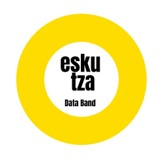

</center>